# Projeto: Forecast indicadores econômicos

Um **forecast** (ou previsão) é o processo de estimar ou prever valores futuros com base em dados históricos e padrões observados. No contexto de machine learning e análise de séries temporais, um forecast utiliza modelos estatísticos ou de aprendizado de máquina para projetar valores futuros de uma variável, como o PIB, inflação, ou demandas de mercado.

Importância do Forecast:

**Tomada de Decisão:**

Forecasts permitem que indivíduos, empresas e governos tomem decisões baseadas em projeções futuras. Por exemplo, uma previsão de crescimento econômico ou inflação ajuda a orientar decisões de política monetária e fiscal.

**Planejamento Estratégico:**

Organizações usam previsões para planejar a alocação de recursos, ajustar estratégias e se preparar para cenários futuros. Por exemplo, empresas podem prever demanda futura para ajustar seus estoques e produção.

Um forecast (previsão) geralmente é feito de forma contínua, sendo atualizado ao longo do tempo conforme novas informações e dados das variáveis explicativas são divulgados. Esse processo é chamado de previsão rolling ou previsão recursiva, onde o modelo vai sendo recalibrado com os dados mais recentes para melhorar a acurácia das previsões.

Como funciona na prática:

**Atualização contínua dos dados:**

À medida que novas observações das variáveis explicativas (como inflação, taxa de juros, produção industrial, etc.) são divulgadas, o modelo de forecast é atualizado. Isso significa que, em um cenário de previsão de PIB, por exemplo, você utilizaria os dados mais recentes de indicadores econômicos assim que eles forem publicados.

**Revisão das Previsões:**

Cada vez que os dados mais atuais de uma variável são divulgados, o modelo pode recalcular a previsão futura. Isso permite que o forecast seja mais dinâmico e se ajuste conforme o contexto econômico evolui.

Timeline:

Início do mês  ------ X1 ------------------ X2 ----------------Projeção inicial--------------- X3 ---------------Projeção final------------- Target (final do mês)

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Importa o dataset
dataset = pd.read_excel('data.xlsx').set_index('Date')

# Preenche valores nulos com a média da coluna
dataset = dataset.fillna(dataset.mean())
dataset

# Separa os ultimos 24 meses para validação do modelo
validacao = dataset.tail(24)
dataset = dataset.iloc[:-24]

dataset.head()

,PIB Mensal,PIM Geral,PIM Industria Extrativa,PIM Industria de Transformacao,PIM Bens de Capital,PIM Bens de Consumo,Exportações,Importações,PMC Ampliado,Câmbio,Taxa de Desemprego,LSPA Area Plantada,Despesa Governo,Consumo de Energia,Concessão de Crédito,IPCA,ICEI – Condicoes,SELIC
Date,,,,,,,,,,,,,,,,,,
1990-01-01,0.2,105.738097,105.430002,105.533376,94.772643,109.52465,2279822697,1678274554,85.485748,14.24,10.171141,7.590279e+07,70538.582352,3.691415e+07,334037.708075,67.55,46.756571,36957.20
1990-02-01,0.4,105.738097,105.430002,105.533376,94.772643,109.52465,1974460602,1251569870,85.485748,23.54,10.171141,7.590279e+07,70538.582352,3.691415e+07,334037.708075,75.73,46.756571,438898.83
1990-03-01,0.8,105.738097,105.430002,105.533376,94.772643,109.52465,2231975909,1646230450,85.485748,37.01,10.171141,7.590279e+07,70538.582352,3.691415e+07,334037.708075,82.39,46.756571,3507.42
1990-04-01,0.7,105.738097,105.430002,105.533376,94.772643,109.52465,2558374314,1362700701,85.485748,47.30,10.171141,7.590279e+07,70538.582352,3.691415e+07,334037.708075,15.52,46.756571,73.21
1990-05-01,0.8,105.738097,105.430002,105.533376,94.772643,109.52465,3231774810,1534042438,85.485748,51.94,10.171141,7.590279e+07,70538.582352,3.691415e+07,334037.708075,7.59,46.756571,88.57


<Axes: >

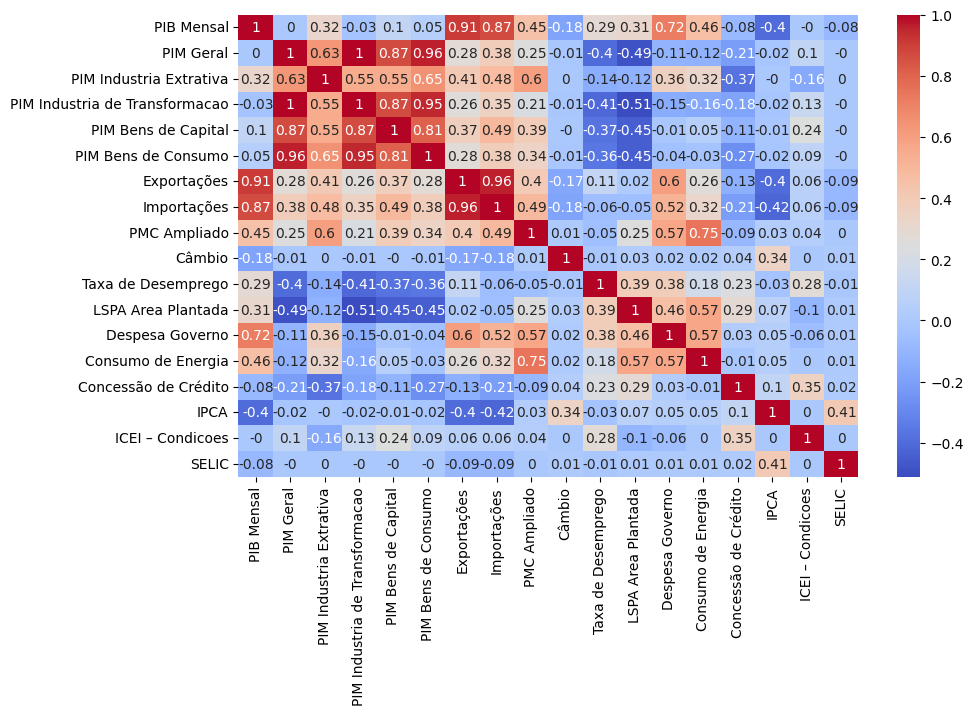

In [45]:
# Mapa de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr().round(2), annot=True, cmap='coolwarm')

In [ ]:
'''# Plota histograma
%matplotlib inline

for column in dataset.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=dataset, x=column)
    plt.show()'''

In [65]:
# Divide o dataset em treino e teste
from sklearn.model_selection import train_test_split

X = dataset.drop('PIB Mensal', axis=1)
y = dataset['PIB Mensal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplica o scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso

MSE: 1412342803.577148
R2: 0.9733231679736477


c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.723e+11, tolerance: 1.634e+09
  model = cd_fast.enet_coordinate_descent(


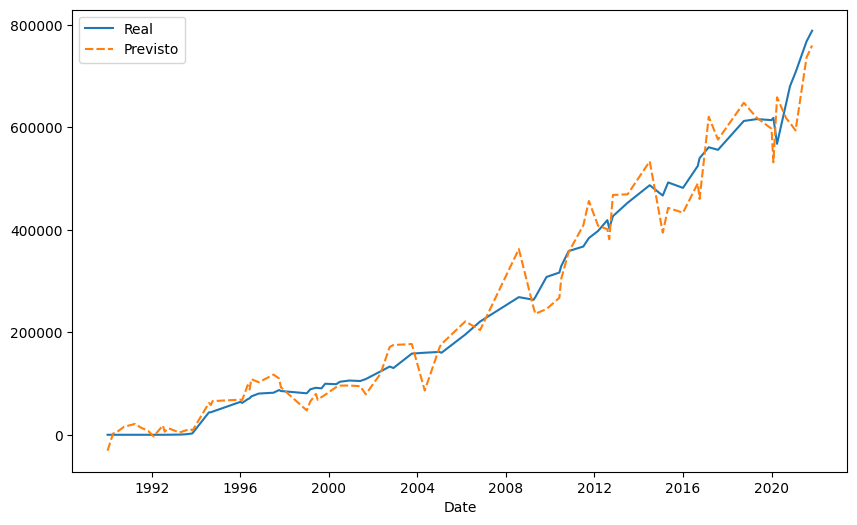

In [66]:
# Aplica o modelo Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.8)
lasso.fit(X_train_scaled, y_train)

# Avalia o modelo
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

# Cria um dataframe com os valores reais e previstos
df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})

# Plota o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=df)
plt.show()

## Ajuste de hiperparâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV

# Escala as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define os parâmetros para o GridSearchCV
lasso_parameter = {
    'alpha': [0.1, 0.5, 0.8, 1, 1.5, 2, 3, 4, 5, 6],
    'max_iter': [1000, 5000, 10000]  # Aumenta o número de iterações
}

lasso = Lasso()
lasso_grid = GridSearchCV(lasso, lasso_parameter, cv=10)

lasso_grid.fit(X_train_scaled, y_train)

print(f'Melhor parâmetro: {lasso_grid.best_params_}')
print(f'Melhor score: {lasso_grid.best_score_}')

# XGBoost

MSE: 203680142.5549996
R2: 0.9961528171940401
RME: 14271.655214269982


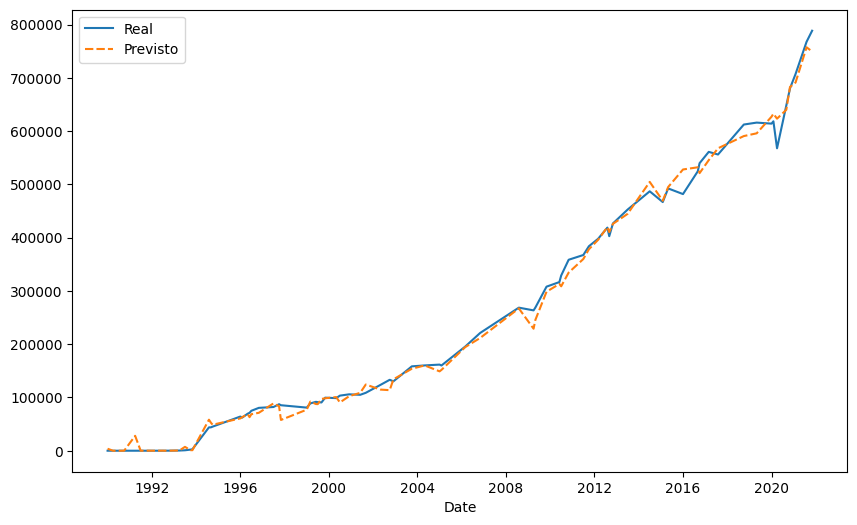

In [68]:
# Aplica o modelo XGBoost
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train_scaled, y_train)

# Avalia o modelo
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Previsão do modelo
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')
rme = np.sqrt(mse)
print(f'RME: {rme}')

# cria um dataframe com os valores reais e previstos
df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})

# Plota o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=df)
plt.show()

In [69]:
# Calcula r2 nos dados de treino
y_pred_train = model.predict(X_train_scaled)
r2_train = r2_score(y_train, y_pred_train)
print(f'R2 Treino: {r2_train}')

R2 Treino: 0.9999999736820209


## Ajuste hiperparâmetros

In [51]:
from sklearn.model_selection import GridSearchCV

xgb_parameter = {'n_estimators': [100, 200, 300],
                    'learning_rate': [0.01, 0.05, 0.1, 0.3],
                    'max_depth': [3, 4, 5, 6]}

model = XGBRegressor()

model_grid = GridSearchCV(model, xgb_parameter, cv=10)

model_grid.fit(X_train_scaled, y_train)

print(f'Melhor parâmetro: {model_grid.best_params_}')
print(f'Melhor score: {model_grid.best_score_}')

Melhor parâmetro: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}
Melhor score: 0.9926115722048602


MSE: 193643917.45545945


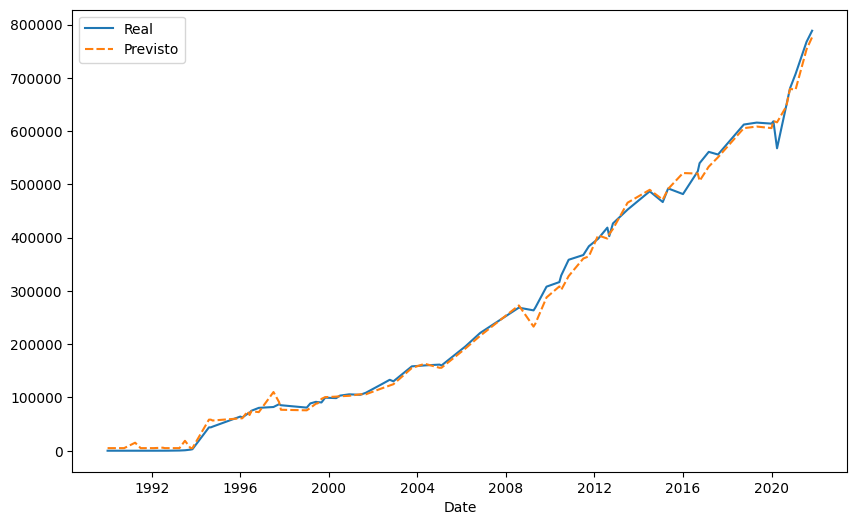

In [52]:
# Testa o modelo com os melhores parâmetros
model = XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=3)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
r2 = r2_score(y_test, y_pred)

# Cria um dataframe com os valores reais e previstos
df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})

# Plota o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=df)
plt.show()

MSE: 20489327833.685093
R2: -9.893022301699215


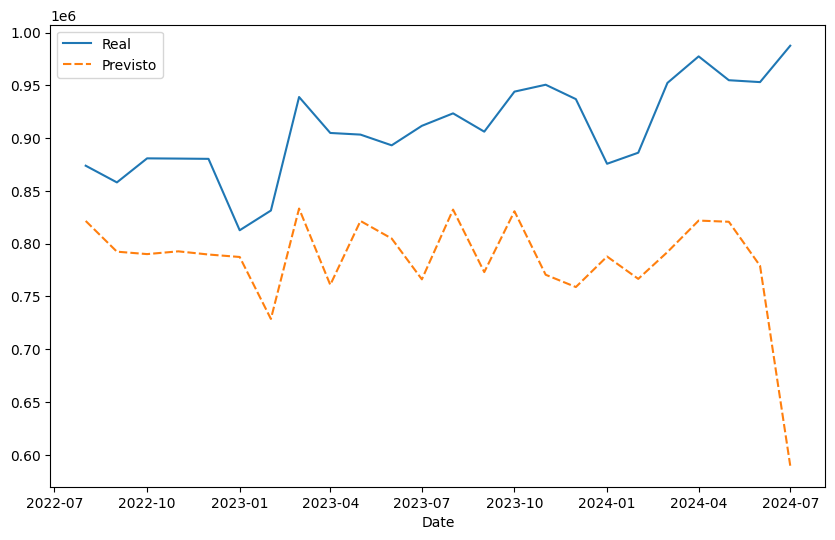

In [59]:
# Aplica o modelo nos dados de validação
X_validacao = validacao.drop('PIB Mensal', axis=1)
y_validacao = validacao['PIB Mensal']

X_validacao_scaled = scaler.transform(X_validacao)

y_pred_val = model.predict(X_validacao_scaled)
mse = mean_squared_error(y_validacao, y_pred_val)
print(f'MSE: {mse}')
r2 = r2_score(y_validacao, y_pred_val)
print(f'R2: {r2}')

# Cria um dataframe com os valores reais e previstos
df = pd.DataFrame({'Real': y_validacao, 'Previsto': y_pred_val})

# Plota o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=df)
plt.show()